In [ ]:
!pip install -U langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core langchain_groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/

In [ ]:
round=0
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
#TAVILY_API_KEY=userdata.get('TAVILY_API_KEY')
print(langsmith)

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


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="test1"
#os.environ["TAVILY_API_KEY"]="TAVILY_API_KEY"
os.environ["OPENAI_API_KEY"]=""

In [ ]:
from typing import Annotated,Sequence

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from langchain_core.messages import BaseMessage,  HumanMessage,AIMessage,ToolMessage
import operator

class AgentGraphState(TypedDict):


    messages:Annotated[list, add_messages]
    prosecutor_response: Annotated[list, add_messages]
    judge_question: Annotated[list, add_messages]
    fact: Annotated[list, add_messages]
    round: int
    defence_response: Annotated[list, add_messages]
    round_limit:int



In [ ]:
State={

    "judge_question_prosecutor":[],
    "judge_question_defence":[],
    "prosecutor_response":[],
    "defence_response":[],
    "Final_Verdict":[],
    "explanation":[],
    "round" : int(0),
    "round_limit":int,
    "case_no":int
}

In [ ]:
output={

}

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph, MessagesState, START

from langchain_core.messages import SystemMessage

In [ ]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

In [ ]:
!pip install langchain-openai

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
import json

# Open and read the JSON file
with open('/content/crime_test_docs_fact.json', 'r') as file:
    # Read the file line by line and parse each line as a separate JSON object
    ds = [json.loads(line) for line in file]

In [ ]:
files=[]
dates = []
case_details = []

# Iterate over each dictionary in the list
for case_dict in ds:
    for filename, details in case_dict.items():
        # Extract the date from the filename (before the first underscore)
        date = filename.split('_')[0]
        files.append(filename)
        # Append the date and case details to the respective lists
        dates.append(date)
        case_details.append(details)

# Output the results
print("Dates:", dates)
print("Case Details:", case_details)

Dates: ['2011', '2008', '2001', '2007', '2012', '2011', '2007', '2012', '2011', '2004', '2019', '2013', '2006', '2003', '2006', '2001', '2011', '2017', '2017', '2015', '2015', '2010', '2003', '2000', '2008', '2009', '2006', '2008', '2017', '2010', '2002', '2018', '2011', '2006', '2017', '2009', '2017', '2001', '2018', '2003', '2003', '2006', '2016', '2006', '2001', '2011', '2015', '2002', '2016', '2004', '2012', '2010', '2017', '2001', '2008', '2017', '2019', '2018', '2007', '2012', '2015', '2008', '2011', '2018', '2006', '2011', '2012', '2006', '2018', '2007', '2008', '2009', '2015', '2008', '2018', '2013', '2012', '2013', '2015', '2014', '2002', '2016', '2018', '2007', '2003', '2008', '2018', '2018', '2000', '2007', '2017', '2007', '2018', '2002', '2011', '2019', '2017', '2017', '2009', '2012']
Case Details: ['These two consolidated cases involve the Fair Sentencing Act of 2010 (FSA) which became law on August 3, 2010. The FSA increased the amount of crack cocaine necessary to trigge

In [ ]:
def get_fact(i):
  with open('/content/Judge_Petitioner_Argument_test_doc_few_shot_local_maxima.json', 'r') as f2:
    # Read the file line by line and parse each line as a separate JSON object
    d2 = json.load(f2)

  #file_name=files[i]
  filename = files[i]
   #[file_name[:-4] if file_name.endswith('.txt') else file_name ][0]

  t=d2[filename]
  f=t['docid']+".txt"

  with open('/content/crime_train_docs_fact.json', 'r') as f3:
    # Read the file line by line and parse each line as a separate JSON object
    d3 = json.load(f3)

  fact=d3[f]
  return fact

In [ ]:
def get_example(i,a):
  import json

  #file_name=files[i]
  filename = files[i]
   #[file_name[:-4] if file_name.endswith('.txt') else file_name ][0]
  print(filename)
# Print the result



# Open and read the JSON file
  with open('/content/Judge_Petitioner_Argument_test_doc_few_shot_local_maxima.json', 'r') as f1:
    # Read the file line by line and parse each line as a separate JSON object
    d1 = json.load(f1)

  with open('/content/Judge_Respondent_Argument_test_doc_few_shot_local_maxima.json', 'r') as f2:
    # Read the file line by line and parse each line as a separate JSON object
    d2 = json.load(f2)

    example_prosecutor=d1[filename]
    example_defence=d2[filename]
  if(a==1):
    return example_prosecutor
  if (a==2):
    return example_defence



In [ ]:
#Advocate_prosecutor_llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama3-8b-8192")
Advocate_prosecutor_llm=Advocate_prosecutor_llm=ChatOpenAI(
    model="gpt-4o-mini-2024-07-18",
    temperature=0.7,
    max_tokens=None,
    timeout=None,
)
prosecutor_goal = """
You are an expert Advocate.you have completed your masters in law and has been practicing in American court for over 10 years.
In this case you are to act as the prosecutor advocate.Your job is to make sure that your client the victim accused is convicted and is sent to jail.
As the system goes, the judge is going to ask you questions about the case.you are to answer questions trying to prove that the accused is indeed guilty.

Please keep your answer short and to the point. Answer in less than 2 sentence.

here is an example case for you.

These are the facts:{fact}
here is an example of some questions and answers between judge and prosecutor :
examples:{example}

------------end of example-------------------

Here are the case details : {Details}

The Judge will now ask you questions

Here is the question asked by the judge : {Judge_Question}
"""

prosecutor_prompt="""
Here is the next question asked by the judge : {Judge_Question}
answer within 2 sentence

"""

In [ ]:
#Judge_llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama3-8b-8192")
Judge_llm=Advocate_prosecutor_llm=ChatOpenAI(
    model="gpt-4o-mini-2024-07-18",
    temperature=0.7,
    max_tokens=None,
    timeout=None,
)
judge_goal="""

You are a veteran Judge in the American Court for more than 20 years.You have given more than 1000 judgements till now.You are well known is the
legal community for providing accurate judgement.This is a new case for you. Your job is to ask questions to the lawyers and get their response.
After this you are to declare your judgement provide explanation for the same.

First you would be asking questions to the prosecutor lawyer one at a time.Based on your question, the lawyer would provide the answer.After that you can
continue with your next questions and the lawyer answers the same.After every question you would be asked if you want to ask more questions to
the prosecutor or not. When you have no more questions to ask you can move on to the defence lawyer and repeat the same with them.

when you have asked questions to both the sides and are confident about the outcome of the case, then you can proceed to declare the judgement.

here is an example of a court case :

these are the facts:{fact}
interaction  between prosecutor and judge:{prosecutor_example}
interaction between defence and judge:{defence_example}


------------end of examples-----------
Here are the case details : {Details}

please proceed to ask the first question to the prosecutor advocate.your question should be 1 sentence long.

"""

judge_prompt="""
here is the answer provided by the Prosecutor Advocate :{Prosecutor_Response}

Please ask your next question to the prosecutor advocate.your question should be 1 sentence long.


"""

judge_prompt2="""

you have asked enough questions to the prosecutor. now  ask question to the defence advocate.your question should be 1 sentence long.
"""
judge_prompt3="""
here is the answer provided by the Defence Advocate :{defence_response}

Please ask your next question to the Defence advocate.your question should be 1 sentence long.

"""


In [ ]:
Advocate_defence_llm=Advocate_prosecutor_llm=ChatOpenAI(
    model="gpt-4o-mini-2024-07-18",
    temperature=0.7,
    max_tokens=None,
    timeout=None,
)
#Advocate_defence_llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama3-8b-8192")
defence_goal = """
You are an expert Advocate.you have completed your masters in law and has been practicing in American court for over 10 years.
In this case you are to act as the defence advocate.Your job is to make sure that your client, the accused is saved from conviction.
As the system goes, the judge is going to ask you questions about the case.you are to answer questions trying to prove that the accused is actually innocent.

Please keep your answer short and to the point. Answer in with in  2 sentence.

here is an example of a court case :

these are the facts:{fact}


here is an example interaction between judge and defence:{example}



------------end of examples-----------




Here are the case details : {Details}

The Judge has asked these questions to the prosecutor advocate {prosecutor_questions}

here are the response provided by the prosecutor advocate {prosecutor_response}

the judge will now ask you questions and you are to answer them.Your job is to make sure that your client, the accused is saved from conviction.

Here is the question asked by the judge for you : {Judge_Question}
"""

defence_prompt="""
Here is the next question asked by the judge : {Judge_Question}
Answer within than 2 sentence.

"""


In [ ]:
class judge_Agent ():


     memory=ConversationBufferMemory()
     def invoke(self,details,case_no,llm=Judge_llm ):
       Prosecutor_example=get_example(case_no,1)
       Defence_example=get_example(case_no,2)
       Fact=get_fact(case_no)
       Conversation=ConversationChain(
        llm=llm,
        memory=self.memory,
        verbose=True
     )

       if State["round"]==1:
          prompt=judge_goal.format(Details=details,fact=Fact,prosecutor_example=Prosecutor_example,defence_example=Defence_example)
          question= Conversation.predict(input=prompt)


       elif State["round"]<6:
         prompt=judge_prompt.format(Prosecutor_Response=(State["prosecutor_response"][-1]))
         question = Conversation.predict(input=prompt)



       elif State["round"]==6 :
         prompt=judge_prompt2
         question = Conversation.predict(input=prompt)

       else :
         prompt=judge_prompt3.format(defence_response=(State["defence_response"][-1]))
         question = Conversation.predict(input=prompt)


       if State["round"]<6:
        State["judge_question_prosecutor"].append(question)

       else :
         State["judge_question_defence"].append(question)
       return question



<ipython-input-19-9cf9aaf2e46c>:4: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory=ConversationBufferMemory()


In [ ]:
class prosecutor_Agent():

     memory=ConversationBufferMemory()
     def invoke(self,details,case_no,llm=Advocate_prosecutor_llm):
       Prosecutor_example=get_example(case_no,1)
       Fact=get_fact(case_no)

       Conversation=ConversationChain(
        llm=llm,
        memory=self.memory,
        verbose=True
     )

       if State["round"]==1:
          prompt=prosecutor_goal.format(Details=details,fact=Fact,example=Prosecutor_example,Judge_Question=State["judge_question_prosecutor"][-1])
          response= Conversation.predict(input=prompt)


       else:
          prompt=prosecutor_prompt.format(Judge_Question=(State["judge_question_prosecutor"][-1]))
          response = Conversation.predict(input=prompt)


       State["prosecutor_response"].append(response)


       return response


In [ ]:
class defence_Agent():

     memory=ConversationBufferMemory()
     def invoke(self,details,case_no,llm=Advocate_defence_llm ):
       Fact=get_fact(case_no)
       Defence_example=get_example(case_no,2)
       Conversation=ConversationChain(
        llm=llm,
        memory=self.memory,
        verbose=True
     )



       if State["round"]==6:
          prompt=defence_goal.format(Details=details,fact=Fact,example=Defence_example,prosecutor_questions=State["judge_question_prosecutor"],prosecutor_response=State["prosecutor_response"] ,Judge_Question=State["judge_question_defence"][-1])
          response= Conversation.predict(input=prompt)


       else:
          prompt=defence_prompt.format(Judge_Question=(State["judge_question_defence"][-1]))
          response = Conversation.predict(input=prompt)


       State["defence_response"].append(response)


       return response


In [ ]:
p = prosecutor_Agent()
def prosecutor_node(state:AgentGraphState):


    response=p.invoke(state["fact"],State["case_no"])


    return {"prosecutor_response":response }
    #"annotator1_explanation":response["explanation"]}

In [ ]:
j=judge_Agent()
def judge_node(state:AgentGraphState):


    question=j.invoke(state["fact"],State["case_no"])




    return {"judge_question":question }
    #"annotator1_explanation":response["explanation"]}

In [ ]:
d = defence_Agent()
def defence_node(state:AgentGraphState):


    response=d.invoke(state["fact"],State["case_no"])


    return {"defence_response":response }
    #"annotator1_explanation":response["explanation"]}

In [ ]:
def memory_clean(state):
  p.memory.clear()
  j.memory.clear()
  d.memory.clear()
  return {"messages":"begin"}


In [ ]:
def round_node(state:AgentGraphState):
  State["round"]=State["round"]+1
  return {"round":State["round"]}

In [ ]:
def router(state):

    if State["round"]==11:
      return "finish"
    else :
      return "continue"

In [ ]:
def router2(state):
  if State["round"]<(state["round_limit"]+1):
    return "prosecutor"
  elif State["round"] > state["round_limit"] and State["round"] < ((2*state["round_limit"])+1) :
    return "defence"


In [ ]:
workflow = StateGraph(AgentGraphState)
workflow.add_node("memory_clean",memory_clean)
workflow.add_node("prosecutor",prosecutor_node)
workflow.add_node("defence",defence_node)
workflow.add_node("judge",judge_node)
workflow.add_node("Round",round_node)
workflow.add_edge(START, "memory_clean")
workflow.add_edge("memory_clean", "Round")
workflow.add_edge("prosecutor", "Round")
workflow.add_edge("defence", "Round")
workflow.add_conditional_edges(
    "Round",
    router,
    {"continue": "judge","finish":END}

)

workflow.add_conditional_edges(
    "judge",
    router2,
    {"prosecutor": "prosecutor","defence":"defence"}

)

In [ ]:
graph=workflow.compile()

In [ ]:
def convert(a,i):

  key=files[i]
  output[key]={"judge":State["judge_question_prosecutor"],"plaintiff":State["prosecutor_response"]},{"judge":State["judge_question_defence"],"respondant":State["defence_response"]}
  name="round_5_courtroom_simulation_fewshot"
  address="/content/conversations/"+name+".json"
  with open(address, 'a') as json_file:
    json.dump(output, json_file, indent=4)
  json_file.close()

In [ ]:
import json

# Open and read the JSON file
with open('/content/crime_test_docs_fact.json', 'r') as file:
    # Read the file line by line and parse each line as a separate JSON object
    ds = [json.loads(line) for line in file]

In [ ]:
files=[]
dates = []
case_details = []

# Iterate over each dictionary in the list
for case_dict in ds:
    for filename, details in case_dict.items():
        # Extract the date from the filename (before the first underscore)
        date = filename.split('_')[0]
        files.append(filename)
        # Append the date and case details to the respective lists
        dates.append(date)
        case_details.append(details)

# Output the results
print("Dates:", dates)
print("Case Details:", case_details)

Dates: ['2011', '2008', '2001', '2007', '2012', '2011', '2007', '2012', '2011', '2004', '2019', '2013', '2006', '2003', '2006', '2001', '2011', '2017', '2017', '2015', '2015', '2010', '2003', '2000', '2008', '2009', '2006', '2008', '2017', '2010', '2002', '2018', '2011', '2006', '2017', '2009', '2017', '2001', '2018', '2003', '2003', '2006', '2016', '2006', '2001', '2011', '2015', '2002', '2016', '2004', '2012', '2010', '2017', '2001', '2008', '2017', '2019', '2018', '2007', '2012', '2015', '2008', '2011', '2018', '2006', '2011', '2012', '2006', '2018', '2007', '2008', '2009', '2015', '2008', '2018', '2013', '2012', '2013', '2015', '2014', '2002', '2016', '2018', '2007', '2003', '2008', '2018', '2018', '2000', '2007', '2017', '2007', '2018', '2002', '2011', '2019', '2017', '2017', '2009', '2012']
Case Details: ['These two consolidated cases involve the Fair Sentencing Act of 2010 (FSA) which became law on August 3, 2010. The FSA increased the amount of crack cocaine necessary to trigge

In [ ]:
len(case_details)

100

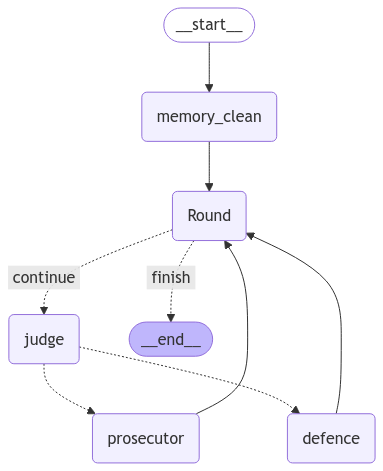

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
fact="""
In 1996, a private researcher hired petitioner Frederick Allen and his company, Nautilus Productions, LLC, to document the recently discovered
shipwreck of Blackbeard’s Queen Anne’s Revenge, which ran aground at Beaufort, North Carolina, in 1718. Allen documented the shipwreck for nearly
twenty years in photographs and videos and registered his works with the U.S. Copyright Office. At some point before October 2013, the state of
North Carolina posted various of the copyrighted works of Allen online without his permission. In October 2013, the state and other involved parties
entered into a settlement agreement with Allen and his company, paying him for the infringement of his works and agreeing not to infringe the works going forward. At the time, the state removed its infringing works, but shortly afterward, it again posted and published Allen’s works. The state then passed “Blackbeard’s Law,” which purportedly converted Allen’s works into “public record” materials that the state could use freely. Allen sued the state for copyright infringement, and the state moved to dismiss on the grounds of sovereign immunity under the Eleventh Amendment of the U.S. Constitution. Allen argued that the Copyright Remedy Clarification Act (CRCA)—which defines potential infringers of copyright to include “any State, any instrumentality of a State, and any officer of a State or instrumentality of a State acting in his or her official capacity”—abrogates state sovereign immunity for copyright infringement claims. The district court denied the motion to dismiss, finding persuasive Allen’s arguments regarding the CRCA’s abrogation of sovereign immunity. The Fourth Circuit reversed, finding that Congress lacked authority to abrogate state sovereign immunity via the CRCA.

"""

In [ ]:
round_limit=5
for i in range(100):
  output.clear()
  State={

    "judge_question_prosecutor":[],
    "judge_question_defence":[],
    "prosecutor_response":[],
    "defence_response":[],
    "Final_Verdict":[],
    "explanation":[],
    "round" : int(0),
    "round_limit":int,
    "case_no":i
  }

  for event in graph.stream({'fact':case_details[i],'round_limit':round_limit},{"recursion_limit": 1000}):
      print(event.values())
  convert(round_limit,i)



Streaming output truncated to the last 5000 lines.
dict_values([{'messages': 'begin'}])
dict_values([{'round': 1}])
2017_15-1498.txt
2017_15-1498.txt


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: 

You are a veteran Judge in the American Court for more than 20 years.You have given more than 1000 judgements till now.You are well known is the
legal community for providing accurate judgement.This is a new case for you. Your job is to ask questions to the lawyers and get their response.
After this you are to declare your judgement provide explanation for the same.

First you would be asking questions to the prosecutor lawyer one at a time.Based on your question, the lawyer would provide the answer.After that y